In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline 

In [2]:
test_id = pd.read_csv("test_identity.csv")
train_id = pd.read_csv("train_identity.csv")
test_tr = pd.read_csv("test_transaction.csv")
train_tr = pd.read_csv("train_transaction.csv") 

In [3]:
print(train_id.shape)
print(train_tr.shape) 

(144233, 41)
(590540, 394)


## Preprocessing & Data Cleaning

In [4]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left') 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [7]:
def objectcols(df):
    for cols in df.columns:
            if df[cols].dtype == 'object':
                print (cols)

In [8]:
objectcols(train)

ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id_12
id_15
id_16
id_23
id_27
id_28
id_29
id_30
id_31
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


In [9]:
objectcols(test)

ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id-12
id-15
id-16
id-23
id-27
id-28
id-29
id-30
id-31
id-33
id-34
id-35
id-36
id-37
id-38
DeviceType
DeviceInfo


In [10]:
def differentcolumns(traincols, testcols):
     for i in traincols:
             if i not in testcols:
                     print(i)
differentcolumns(train.columns, test.columns) 

isFraud
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38


In [11]:
test = test.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03",
 "id-06": "id_06", "id-05": "id_05", "id-04": "id_04",
 "id-07": "id_07", "id-08": "id_08", "id-09": "id_09",
 "id-10": "id_10", "id-11": "id_11", "id-12": "id_12",
 "id-15": "id_15", "id-14": "id_14", "id-13": "id_13",
 "id-16": "id_16", "id-17": "id_17", "id-18": "id_18",
 "id-21": "id_21", "id-20": "id_20", "id-19": "id_19",
 "id-22": "id_22", "id-23": "id_23", "id-24": "id_24",
 "id-27": "id_27", "id-26": "id_26", "id-25": "id_25",
 "id-28": "id_28", "id-29": "id_29", "id-30": "id_30",
 "id-31": "id_31", "id-32": "id_32", "id-33": "id_33",
 "id-34": "id_34", "id-35": "id_35", "id-36": "id_36",
 "id-37": "id_37", "id-38": "id_38"})
test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN  F    F    T    T  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0

In [12]:
def valuecounts(df):
    
    dfobjectlist = []
    
    for cols in df.columns:
            if df[cols].dtype == 'object':
                #print (cols)
                dfobjectlist.append(cols)
    a = 0
    
    while a < len(dfobjectlist):
        
        b = dfobjectlist[a]
        
        if dfobjectlist != []:
            a+=1
            print(train[b].value_counts())
            print('\n')
            continue
            
        else:
            break

In [13]:
valuecounts(train)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [14]:
valuecounts(test)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [15]:
def nullvalues(data):
        total = data.isnull().sum().sort_values(ascending=False)
        percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
        missing_data= pd.concat([total, percent], axis=1, keys=['total', 'percent'])
        return missing_data


In [16]:
missing_data_train = nullvalues(train)
missing_data_train.head(350).T

id_24         id_25          id_07          id_08  \
total    585793.000000  585408.00000  585385.000000  585385.000000   
percent       0.991962       0.99131       0.991271       0.991271   

                 id_21          id_26          id_22          id_23  \
total    585381.000000  585377.000000  585371.000000  585371.000000   
percent       0.991264       0.991257       0.991247       0.991247   

                 id_27          dist2             D7          id_18  \
total    585371.000000  552913.000000  551623.000000  545427.000000   
percent       0.991247       0.936284       0.934099       0.923607   

                   D13            D14           D12          id_04  \
total    528588.000000  528353.000000  525823.00000  524216.000000   
percent       0.895093       0.894695       0.89041       0.887689   

                 id_03             D6          id_33          id_10  \
total    524216.000000  517353.000000  517251.000000  515614.000000   
percent       0.887689       0.876068       0.875895       0.873123   

                    D8             D9          id_09          id_30  \
total    515614.000000  515614.000000  515614.000000  512975.000000   
percent       0.873123       0.873123       0.873123       0.868654   

                 id_32          id_34          id_14           V149  \
total    512954.000000  512735.000000  510496.000000  508595.000000   
percent       0.868619       0.868248       0.864456       0.861237   

                  V153           V156           V154           V155  \
total    508595.000000  508595.000000  508595.000000  508595.000000   
percent       0.861237       0.861237       0.861237       0.861237   

                  V157           V158           V161           V163  \
total    508595.000000  508595.000000  508595.000000  508595.000000   
percent       0.861237       0.861237       0.861237       0.861237   

                  V147           V148           V162           V146  \
total    508595.000000  508595.000000  508595.000000  508595.000000   
percent       0.861237       0.861237       0.861237       0.861237   

                  V138           V139           V140           V141  \
total    508595.000000  508595.000000  508595.000000  508595.000000   
percent       0.861237       0.861237       0.861237       0.861237   

                  V142           V166           V164           V160  \
total    508595.000000  508589.000000  508589.000000  508589.000000   
percent       0.861237       0.861227       0.861227       0.861227   

                  V159           V143           V144           V145  \
total    508589.000000  508589.000000  508589.000000  508589.000000   
percent       0.861227       0.861227       0.861227       0.861227   

                  V152           V151           V150           V165  \
total    508589.000000  508589.000000  508589.000000  508589.000000   
percent       0.861227       0.861227       0.861227       0.861227   

                 V339          V322          V338          V337          V336  \
total    508189.00000  508189.00000  508189.00000  508189.00000  508189.00000   
percent       0.86055       0.86055       0.86055       0.86055       0.86055   

                 V335          V334          V333          V332          V331  \
total    508189.00000  508189.00000  508189.00000  508189.00000  508189.00000   
percent       0.86055       0.86055       0.86055       0.86055       0.86055   

                 V330          V329          V328          V327          V326  \
total    508189.00000  508189.00000  508189.00000  508189.00000  508189.00000   
percent       0.86055       0.86055       0.86055       0.86055       0.86055   

                 V325          V324          V323     DeviceInfo  \
total    508189.00000  508189.00000  508189.00000  471874.000000   
percent       0.86055       0.86055       0.86055       0.799055   

                 id_13         id_16           V237           V230  \
total    463220.0000

In [17]:
# Test Data Missing Values
missing_data_test = nullvalues(test)
missing_data_test.head(350).T

id_24          id_25          id_26          id_07  \
total    501951.000000  501652.000000  501644.000000  501632.000000   
percent       0.990645       0.990055       0.990039       0.990016   

                 id_08          id_21         id_27         id_22  \
total    501632.000000  501632.000000  501629.00000  501629.00000   
percent       0.990016       0.990016       0.99001       0.99001   

                id_23         dist2          id_18             D7  \
total    501629.00000  470255.00000  455816.000000  446558.000000   
percent       0.99001       0.92809       0.899594       0.881322   

                 id_04          id_03            D12          id_30  \
total    440210.000000  440210.000000  437437.000000  436032.000000   
percent       0.868794       0.868794       0.863321       0.860548   

                 id_32          id_33          id_14          id_34  \
total    436020.000000  436020.000000  435334.000000  434516.000000   
percent       0.860524       0.860524       0.859171       0.857556   

                 id_09             D9          id_10             D8  \
total    432353.000000  432353.000000  432353.000000  432353.000000   
percent       0.853287       0.853287       0.853287       0.853287   

                  V153           V157           V154           V155  \
total    430906.000000  430906.000000  430906.000000  430906.000000   
percent       0.850432       0.850432       0.850432       0.850432   

                  V156           V158           V148           V161  \
total    430906.000000  430906.000000  430906.000000  430906.000000   
percent       0.850432       0.850432       0.850432       0.850432   

                  V162           V163           V149           V147  \
total    430906.000000  430906.000000  430906.000000  430906.000000   
percent       0.850432       0.850432       0.850432       0.850432   

                  V146           V138           V139           V140  \
total    430906.000000  430906.000000  430906.000000  430906.000000   
percent       0.850432       0.850432       0.850432       0.850432   

                  V141           V142           V166           V164  \
total    430906.000000  430906.000000  430636.000000  430636.000000   
percent       0.850432       0.850432       0.849899       0.849899   

                  V160           V159           V143           V144  \
total    430636.000000  430636.000000  430636.000000  430636.000000   
percent       0.849899       0.849899       0.849899       0.849899   

                  V145           V152           V165           V150  \
total    430636.000000  430636.000000  430636.000000  430636.000000   
percent       0.849899       0.849899       0.849899       0.849899   

                  V151           V328           V327           V339  \
total    430636.000000  430260.000000  430260.000000  430260.000000   
percent       0.849899       0.849157       0.849157       0.849157   

                  V338           V337           V336           V335  \
total    430260.000000  430260.000000  430260.000000  430260.000000   
percent       0.849157       0.849157       0.849157       0.849157   

                  V334           V333           V332           V331  \
total    430260.000000  430260.000000  430260.000000  430260.000000   
percent       0.849157       0.849157       0.849157       0.849157   

                  V330           V322           V323           V324  \
total    430260.000000  430260.000000  430260.000000  430260.000000   
percent       0.849157       0.849157       0.849157       0.849157   

                  V325           V329           V326     DeviceInfo  \
total    430260.000000  430260.000000  430260.000000  391634.000000   
percent       0.849157       0.849157       0.849157       0.772925   

                   D14            D13            D6          id_16  \
total    391497.000000  383307.000000  381908.00000  380944.000000   
percent       0.772654       0.756491

In [18]:
# Get the columns that we have to drop
droppedcols = list(missing_data_train[missing_data_train['percent'] >.20].index)
droppedcols

['id_24',
 'id_25',
 'id_07',
 'id_08',
 'id_21',
 'id_26',
 'id_22',
 'id_23',
 'id_27',
 'dist2',
 'D7',
 'id_18',
 'D13',
 'D14',
 'D12',
 'id_04',
 'id_03',
 'D6',
 'id_33',
 'id_10',
 'D8',
 'D9',
 'id_09',
 'id_30',
 'id_32',
 'id_34',
 'id_14',
 'V149',
 'V153',
 'V156',
 'V154',
 'V155',
 'V157',
 'V158',
 'V161',
 'V163',
 'V147',
 'V148',
 'V162',
 'V146',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V166',
 'V164',
 'V160',
 'V159',
 'V143',
 'V144',
 'V145',
 'V152',
 'V151',
 'V150',
 'V165',
 'V339',
 'V322',
 'V338',
 'V337',
 'V336',
 'V335',
 'V334',
 'V333',
 'V332',
 'V331',
 'V330',
 'V329',
 'V328',
 'V327',
 'V326',
 'V325',
 'V324',
 'V323',
 'DeviceInfo',
 'id_13',
 'id_16',
 'V237',
 'V230',
 'V267',
 'V266',
 'V265',
 'V264',
 'V263',
 'V262',
 'V261',
 'V260',
 'V228',
 'V258',
 'V257',
 'V229',
 'V254',
 'V269',
 'V253',
 'V252',
 'V231',
 'V232',
 'V249',
 'V248',
 'V247',
 'V246',
 'V233',
 'V244',
 'V243',
 'V242',
 'V241',
 'V240',
 'V268',
 'V226',
 '

In [19]:
# Drop the columns
train.drop(droppedcols, axis=1, inplace=True)
test.drop(droppedcols, axis=1, inplace=True) 

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 182 entries, TransactionID to V321
dtypes: float64(174), int64(4), object(4)
memory usage: 824.5+ MB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 181 entries, TransactionID to V321
dtypes: float64(174), int64(3), object(4)
memory usage: 703.6+ MB


In [22]:
print(train.shape)
print(test.shape) 

(590540, 182)
(506691, 181)


In [23]:
objectcols(train)

ProductCD
card4
card6
P_emaildomain


In [24]:
objectcols(train)

ProductCD
card4
card6
P_emaildomain


In [25]:
valuecounts(train)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [26]:
valuecounts(test)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net      

In [27]:
train['P_emaildomain'].value_counts().head()

gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
Name: P_emaildomain, dtype: int64

In [28]:
train1= train[train['P_emaildomain'].isin(['gmail.com','yahoo.com','hotmail.com','anonymous.com','aol.com'])]

In [29]:
train1.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
1        2987001        0          86401            29.0         W   2755   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   
5        2987005        0          86510            49.0         W   5937   
6        2987006        0          86522           159.0         W  12308   

   card2  card3       card4  card5   card6  addr1  addr2 P_emaildomain   C1  \
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0     gmail.com  1.0   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0     yahoo.com  2.0   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0     gmail.com  1.0   
5  555.0  150.0        visa  226.0   debit  272.0   87.0     gmail.com  1.0   
6  360.0  150.0        visa  166.0   debit  126.0   87.0     yahoo.com  1.0   

    C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   
5  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
6  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   

    D10    D15  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  \
1   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
3  84.0  111.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
4   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
6   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   

   V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V53  V54  V55  V56  \
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
6  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  \
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  \
1  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
6  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   

   V87  V88  V89  V90  V91  V92  V93  V94  V95   V96   V97  V98   V99  V100  \
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  48.0  28.0  0.0  10.0   4.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   0.0   0.0  0.0   0.0   0.0   
5  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   
6  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   

   V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  \
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   1.0  38.0  24.0   0.0   0.0   0.0   1.0   1.0   1.0

In [30]:
train1.groupby('P_emaildomain').describe()

TransactionID                                          \
                      count          mean            std        min   
P_emaildomain                                                         
anonymous.com       36998.0  3.264887e+06  175524.137686  2987008.0   
aol.com             28289.0  3.282165e+06  170936.546679  2987013.0   
gmail.com          228355.0  3.285850e+06  168755.941757  2987001.0   
hotmail.com         45250.0  3.272227e+06  169424.937050  2987011.0   
yahoo.com          100934.0  3.286049e+06  168152.540250  2987003.0   

                                                              isFraud  \
                      25%        50%         75%        max     count   
P_emaildomain                                                           
anonymous.com  3094875.50  3255945.5  3419398.75  3577506.0   36998.0   
aol.com        3133857.00  3279995.0  3431366.00  3577538.0   28289.0   
gmail.com      3140330.00  3288313.0  3430197.00  3577539.0  228355.0   
hotmail.com    3118321.75  3265746.0  3416080.25  3577517.0   45250.0   
yahoo.com      3145056.25  3287899.0  3430081.75  3577530.0  100934.0   

                                                           TransactionDT  \
                   mean       std  min  25%  50%  75%  max         count   
P_emaildomain                                                              
anonymous.com  0.023217  0.150596  0.0  0.0  0.0  0.0  1.0       36998.0   
aol.com        0.021811  0.146067  0.0  0.0  0.0  0.0  1.0       28289.0   
gmail.com      0.043542  0.204074  0.0  0.0  0.0  0.0  1.0      228355.0   
hotmail.com    0.052950  0.223937  0.0  0.0  0.0  0.0  1.0       45250.0   
yahoo.com      0.022757  0.149130  0.0  0.0  0.0  0.0  1.0      100934.0   

                                                                          \
                       mean           std      min        25%        50%   
P_emaildomain                                                              
anonymous.com  6.924774e+06  4.733838e+06  86535.0  2139076.0  6527164.5   
aol.com        7.373973e+06  4.627886e+06  86585.0  3017277.0  7237089.0   
gmail.com      7.463568e+06  4.575910e+06  86401.0  3177819.0  7433094.0   
hotmail.com    7.091759e+06  4.587285e+06  86555.0  2596861.5  6796684.5   
yahoo.com      7.469994e+06  4.556013e+06  86499.0  3287773.5  7427608.5   

                                       TransactionAmt                          \
                       75%         max          count        mean         std   
P_emaildomain                                                                   
anonymous.com  10940086.00  15810402.0        36998.0  169.490822  269.005718   
aol.com        11302676.00  15811088.0        28289.0  176.880681  279.405476   
gmail.com      11278530.00  15811131.0       228355.0  128.630195  227.044011   
hotmail.com    10853688.75  15810626.0        45250.0   99.931049  198.507857   
yahoo.com      11273240.00  15810926.0       100934.0  144.201108  274.237537   

                                                             card1  \
                 min     25%     50%      75%        max     count   
P_emaildomain                                                        
anonymous.com  0.292  50.000  100.00  200.000   4843.750   36998.0   
aol.com        3.500  56.950  103.97  200.000   4989.970   28289.0   
gmail.com      0.272  39.998   59.00  117.000   5420.000  228355.0   
hotmail.com    0.251  27.051   50.00  100.599   5279.950   45250.0   
yahoo.com      2.000  49.000   77.95  141.000  31937.391  100934.0   

                                                                           \
                      mean          std     min     25%      50%      75%   
P_emaildomain                                                               
anonymous.com  9784.554679  4976.768759  1004.0  5901.0   9633.0  14259.0   
aol.com        9918.611510  4803.547716  1004.0  6019.0  10023.0  13813.0   
gmail.com      9914.644615  4874.092168  1000.0

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

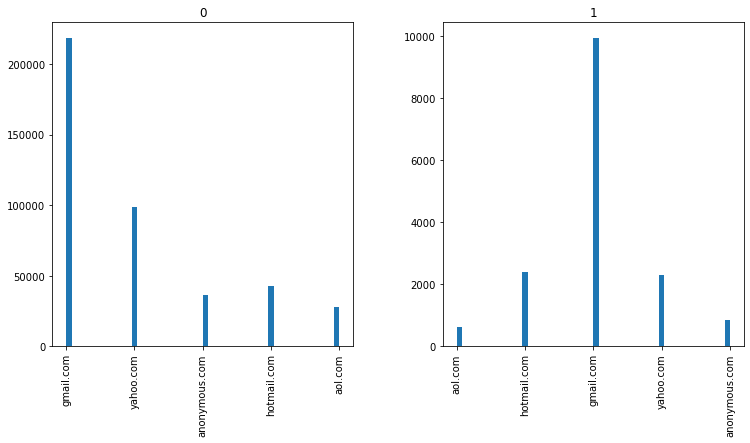

In [31]:
train1.hist(column = 'P_emaildomain', by = 'isFraud', bins = 50, figsize = (12,6))

In [32]:
table = pd.crosstab(train1['isFraud'], train1['P_emaildomain'])
print(table)

P_emaildomain  anonymous.com  aol.com  gmail.com  hotmail.com  yahoo.com
isFraud                                                                 
0                      36139    27672     218412        42854      98637
1                        859      617       9943         2396       2297


In [33]:
mylist = ['anonymous.com', 'aol.com', 'gmail.com', 'hotmail.com', 'yahoo.com']

while mylist != []:
    
    a = mylist[0]
    
    print(f'For {a}')
    print(train1[train1['P_emaildomain']== a]['isFraud'].value_counts(normalize = True))
    print('\n')
    mylist.pop(0)
    
    continue

For anonymous.com
0    0.976783
1    0.023217
Name: isFraud, dtype: float64


For aol.com
0    0.978189
1    0.021811
Name: isFraud, dtype: float64


For gmail.com
0    0.956458
1    0.043542
Name: isFraud, dtype: float64


For hotmail.com
0    0.94705
1    0.05295
Name: isFraud, dtype: float64


For yahoo.com
0    0.977243
1    0.022757
Name: isFraud, dtype: float64




In [34]:
table = pd.crosstab(train['isFraud'], train['ProductCD'])
print(table)

ProductCD      C      H      R      S       W
isFraud                                      
0          60511  31450  36273  10942  430701
1           8008   1574   1426    686    8969


In [35]:
mylist = ['C', 'H', 'R', 'S', 'W']

while mylist != []:
    
    a = mylist[0]
    
    print(f'For {a}')
    print(train[train['ProductCD']== a]['isFraud'].value_counts(normalize = True))
    print('\n')
    mylist.pop(0)
    
    continue

For C
0    0.883127
1    0.116873
Name: isFraud, dtype: float64


For H
0    0.952338
1    0.047662
Name: isFraud, dtype: float64


For R
0    0.962174
1    0.037826
Name: isFraud, dtype: float64


For S
0    0.941004
1    0.058996
Name: isFraud, dtype: float64


For W
0    0.979601
1    0.020399
Name: isFraud, dtype: float64




In [36]:
mylist = ['visa', 'mastercard', 'american express', 'discover']

while mylist != []:
    
    a = mylist[0]
    
    print(f'For {a}')
    print(train[train['card4']== a]['isFraud'].value_counts(normalize = True))
    print('\n')
    mylist.pop(0)
    
    continue

For visa
0    0.965244
1    0.034756
Name: isFraud, dtype: float64


For mastercard
0    0.965669
1    0.034331
Name: isFraud, dtype: float64


For american express
0    0.971302
1    0.028698
Name: isFraud, dtype: float64


For discover
0    0.922718
1    0.077282
Name: isFraud, dtype: float64




In [37]:
mylist = ['debit', 'credit', 'debit or credit', 'charge card']

while mylist != []:
    
    a = mylist[0]
    
    print(f'For {a}')
    print(train[train['card6']== a]['isFraud'].value_counts(normalize = True))
    print('\n')
    mylist.pop(0)
    
    continue

For debit
0    0.975737
1    0.024263
Name: isFraud, dtype: float64


For credit
0    0.933215
1    0.066785
Name: isFraud, dtype: float64


For debit or credit
0    1.0
Name: isFraud, dtype: float64


For charge card
0    1.0
Name: isFraud, dtype: float64




In [38]:
drop_cols=['card4','card6','P_emaildomain']

train.drop(drop_cols,axis = 1, inplace = True )
test.drop(drop_cols,axis = 1, inplace = True )

In [39]:
objectcols(train)

ProductCD


In [40]:
objectcols(test)

ProductCD


In [41]:
missing_data_train = nullvalues(train)
missing_data_train.head(200).T 

V91           V84           V77           V78           V79  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V80           V81           V82           V83           V85  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V75           V86           V87           V88           V89  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V90           V92           V93           V76           V94  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  D15           V72           V63           V55           V56  \
total    89113.000000  77096.000000  77096.000000  77096.000000  77096.000000   
percent      0.150901      0.130552      0.130552      0.130552      0.130552   

                  V57           V58           V59           V60           V61  \
total    77096.000000  77096.000000  77096.000000  77096.000000  77096.000000   
percent      0.130552      0.130552      0.130552      0.130552      0.130552   

                  V62           V64           V53           V65           V66  \
total    77096.000000  77096.000000  77096.000000  77096.000000  77096.000000   
percent      0.130552      0.130552      0.130552      0.130552      0.130552   

                  V67           V68           V69           V70           V71  \
total    77096.000000  77096.000000  77096.000000  77096.000000  77096.000000   
percent      0.130552      0.130552      0.130552      0.130552      0.130552   

                  V74           V73           V54           V16           V17  \
total    77096.000000  77096.000000  77096.000000  76073.000000  76073.000000   
percent      0.130552      0.130552      0.130552      0.128819      0.128819   

                  V27           V26           V25           V24           V23  \
total    76073.000000  76073.000000  76073.000000  76073.000000  76073.000000   
percent      0.128819      0.128819      0.128819      0.128819      0.128819   

                  V22           V29           V21           V20           V19  \
total    76073.000000  76073.000000  76073.000000  76073.000000  76073.000000   
percent      0.128819      0.128819      0.128819      0.128819      0.128819   

                  V32           V33           V30           V18           V28  \
total    76073.000000  76073.000000  76073.000000  76073.000000  76073.000000   
percent      0.128819      0.128819      0.128819      0.128819      0.128819   

                  V15           V14           V13           V12           V31  \
total    76073.000000  76073.000000  76073.000000  76073.000000  76073.000000   
percent      0.128819      0.128819      0.128819      0.128819      0.128819   

                  V34           D10         addr2         addr1        card2  \
total    76073.000000  76022.000000  65706.000000  65706.000000  8933.000000   
percent      0.128819      0.128733      0.111264      0.111264     0.015127   

               card5       card3         V288         V283         V282  \
total    4259.000000  1565.00000  1269.000000  1269.000000  1269.000000   
percent     0.007212     0.00265     0.002149     0.002149     0.002149   

                V300         V281         V289         V296         V301  \
total    1269.000000  1269.000000  1269.000000  1269.000000  1269.000000   
percent     0.002149     0.002149     0.002149     0.002149     0.002149   

                  D1         V313         V314         V315        V137  \
total    1269.000000  1269.000000  1269.000000  1269.000000  314.000000   


In [42]:
missing_data_test= nullvalues(test)
missing_data_test.head(200).T 

addr1         addr2           V66           V63           V71  \
total    65609.000000  65609.000000  12899.000000  12899.000000  12899.000000   
percent      0.129485      0.129485      0.025457      0.025457      0.025457   

                  V70           V69           V68           V67           V60  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V65           V64           V62           V73           V61  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V53           V54           V55           V56           V57  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V58           V72           V59           V74           V18  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12589.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.024846   

                  V34           V33           V32           V31           V30  \
total    12589.000000  12589.000000  12589.000000  12589.000000  12589.000000   
percent      0.024846      0.024846      0.024846      0.024846      0.024846   

                  V29           V28           V27           V25           V24  \
total    12589.000000  12589.000000  12589.000000  12589.000000  12589.000000   
percent      0.024846      0.024846      0.024846      0.024846      0.024846   

                  V23           V22           V20           V19           V21  \
total    12589.000000  12589.000000  12589.000000  12589.000000  12589.000000   
percent      0.024846      0.024846      0.024846      0.024846      0.024846   

                  V12           V16           V13           V14           V15  \
total    12589.000000  12589.000000  12589.000000  12589.000000  12589.000000   
percent      0.024846      0.024846      0.024846      0.024846      0.024846   

                  V26           V17           D10           V75           V76  \
total    12589.000000  12589.000000  12545.000000  12081.000000  12081.000000   
percent      0.024846      0.024846      0.024759      0.023843      0.023843   

                  V84           V85           V86           V87           V88  \
total    12081.000000  12081.000000  12081.000000  12081.000000  12081.000000   
percent      0.023843      0.023843      0.023843      0.023843      0.023843   

                  V89           V78           V77           V79           V92  \
total    12081.000000  12081.000000  12081.000000  12081.000000  12081.000000   
percent      0.023843      0.023843      0.023843      0.023843      0.023843   

                  V93           V80           V90           V94           V81  \
total    12081.000000  12081.000000  12081.000000  12081.000000  12081.000000   
percent      0.023843      0.023843      0.023843      0.023843      0.023843   

                  V91           V82           V83           D15        card2  \
total    12081.000000  12081.000000  12081.000000  12069.000000  8654.000000   
percent      0.023843      0.023843      0.023843      0.023819     0.017079   

                V282         V283         V288         V289           D1  \
total    6031.000000  6031.000000  6031.000000  6031.000000  6031.000000   
percent     0.011903     0.011903     0.011903     0.011903     0.011903   

                V296         V313         V314         V300         V301  \
total    6031.000000  6031.000000  6031.000000  6031.000000  6031.000000   
percent     0.011903     0.011903     0.011903     0.011903     0.011903   

                V315         V281          C13        card5        card3  \
total    6031.000000  6031.000000  4748.000000  4547.000000  3002.000

In [43]:
missing_data_train = nullvalues(train)
print(missing_data_train.head(100).T) 

                  V91           V84           V77           V78           V79  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V80           V81           V82           V83           V85  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V75           V86           V87           V88           V89  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  V90           V92           V93           V76           V94  \
total    89164.000000  89164.000000  89164.000000  89164.000000  89164.000000   
percent      0.150987      0.150987      0.150987      0.150987      0.150987   

                  D15   

In [44]:
missing_data_test = nullvalues(test)
print(missing_data_test.head(100).T)

                addr1         addr2           V66           V63           V71  \
total    65609.000000  65609.000000  12899.000000  12899.000000  12899.000000   
percent      0.129485      0.129485      0.025457      0.025457      0.025457   

                  V70           V69           V68           V67           V60  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V65           V64           V62           V73           V61  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V53           V54           V55           V56           V57  \
total    12899.000000  12899.000000  12899.000000  12899.000000  12899.000000   
percent      0.025457      0.025457      0.025457      0.025457      0.025457   

                  V58   

In [45]:
differentcolumns(train.columns, test.columns)

isFraud


In [46]:
train_cols = train.columns

for i in train_cols:
     if (i.startswith("C") or (i.startswith("V"))) and train[i].isnull().sum() > 0:
             train[i] = train[i].fillna(train[i].mode()[0])

In [47]:
test_cols = test.columns

for i in test_cols:
     if (i.startswith("C") or (i.startswith("V"))) and test[i].isnull().sum() > 0:
             test[i] = test[i].fillna(test[i].mode()[0])

In [48]:
missing_data_train = nullvalues(train)
missing_data_train.head(100).T

D15           D10         addr1         addr2        card2  \
total    89113.000000  76022.000000  65706.000000  65706.000000  8933.000000   
percent      0.150901      0.128733      0.111264      0.111264     0.015127   

               card5       card3           D1  V62  V69  V68  V67  V66  V65  \
total    4259.000000  1565.00000  1269.000000  0.0  0.0  0.0  0.0  0.0  0.0   
percent     0.007212     0.00265     0.002149  0.0  0.0  0.0  0.0  0.0  0.0   

         V64  V63  V321  V61  V60  V59  V57  V56  V55  V54  V53  V34  V58  \
total    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V71  V70  V32  V88  V87  V86  V85  V84  V83  V82  V81  V80  V79  V78  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V77  V76  V75  V74  V73  V72  V33  V27  V31  V30  C12  C11  C10   C9  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          C8   C7   C6   C5   C4   C3   C2   C1  card1  ProductCD  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0        0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0        0.0   

         TransactionAmt  TransactionDT  isFraud  C13  C14  V12  V22  V29  V28  \
total               0.0            0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent             0.0            0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V90  V26  V25  V24  V23  V21  V13  V20  V19  V18  V17  V16  V15  V14  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V89  V91  V320  V136  V297  V296  V295  V294  V293  V292  V291  V290  
total    0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
percent  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [49]:
missing_data_test = nullvalues(test)
missing_data_test.head(100).T

addr1         addr2           D10           D15        card2  \
total    65609.000000  65609.000000  12545.000000  12069.000000  8654.000000   
percent      0.129485      0.129485      0.024759      0.023819     0.017079   

                  D1        card5        card3  V63  V70  V69  V68  V67  V66  \
total    6031.000000  4547.000000  3002.000000  0.0  0.0  0.0  0.0  0.0  0.0   
percent     0.011903     0.008974     0.005925  0.0  0.0  0.0  0.0  0.0  0.0   

         V65  V64  V321  V62  V61  V71  V59  V58  V57  V56  V55  V54  V53  \
total    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V60  V72  V33  V82  V89  V88  V87  V86  V85  V84  V83  V81  V73  V80  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V79  V78  V77  V76  V75  V74  V34  V28  V32  V31  C13  C12  C11  C10  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          C9   C8   C7   C6   C5   C4   C3   C2   C1  card1  ProductCD  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0        0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0        0.0   

         TransactionAmt  TransactionDT  C14  V12  V13  V23  V30  V29  V320  \
total               0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
percent             0.0            0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

         V27  V26  V25  V24  V22  V14  V21  V20  V19  V18  V17  V16  V15  V90  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V91  V92  V93  V297  V296  V295  V294  V293  V292  V291  V290  
total    0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
percent  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [50]:
train['D1'] = train['D1'].fillna(train['D1'].mode()[0])
test['D1'] = test['D1'].fillna(test['D1'].mode()[0])

In [51]:
train['card3'] = train['card3'].fillna(train['card3'].mode()[0])
test['card3'] = test['card3'].fillna(test['card3'].mode()[0])

In [52]:
train['card2'] = train['card2'].fillna(train['card2'].mode()[0])
test['card2'] = test['card2'].fillna(test['card2'].mode()[0])

In [53]:
train['card5'] = train['card5'].fillna(train['card5'].mode()[0])
test['card5'] = test['card5'].fillna(test['card5'].mode()[0])

In [54]:
missing_data_train = nullvalues(train)
missing_data_train.head(100).T

D15           D10         addr1         addr2  V321  V59  \
total    89113.000000  76022.000000  65706.000000  65706.000000   0.0  0.0   
percent      0.150901      0.128733      0.111264      0.111264   0.0  0.0   

         V66  V65  V64  V63  V62  V61  V60  V58  V68  V57  V56  V55  V54  V53  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V34  V33  V32  V67  V69  V30  V80  V88  V87  V86  V85  V84  V83  V82  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V81  V79  V70  V78  V77  V76  V75  V74  V73  V72  V71  V31  V27  V29  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          C2  C10   C9   C8   C7   C6   C5   C4   C3   C1  V28  card5  card3  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   

         card2  card1  ProductCD  TransactionAmt  TransactionDT  isFraud  C11  \
total      0.0    0.0        0.0             0.0            0.0      0.0  0.0   
percent    0.0    0.0        0.0             0.0            0.0      0.0  0.0   

         C12  C13  C14  V90  V26  V25  V24  V23  V22  V21  V20  V19  V18  V17  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V16  V15  V14  V13  V12   D1  V89  V91  V320  V136  V297  V296  V295  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   

         V294  V293  V292  V291  V290  
total     0.0   0.0   0.0   0.0   0.0  
percent   0.0   0.0   0.0   0.0   0.0

In [55]:
missing_data_test = nullvalues(test)
missing_data_test.head(100).T

addr1         addr2           D10           D15  V321  V60  \
total    65609.000000  65609.000000  12545.000000  12069.000000   0.0  0.0   
percent      0.129485      0.129485      0.024759      0.023819   0.0  0.0   

         V67  V66  V65  V64  V63  V62  V61  V59  V69  V58  V57  V56  V55  V54  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V53  V34  V33  V68  V70  V31  V81  V89  V88  V87  V86  V85  V84  V83  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V82  V80  V71  V79  V78  V77  V76  V75  V74  V73  V72  V32  V28  V30  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          C3  C11  C10   C9   C8   C7   C6   C5   C4   C2  V29   C1  card5  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   

         card3  card2  card1  ProductCD  TransactionAmt  TransactionDT  C12  \
total      0.0    0.0    0.0        0.0             0.0            0.0  0.0   
percent    0.0    0.0    0.0        0.0             0.0            0.0  0.0   

         C13  C14   D1  V320  V27  V26  V25  V24  V23  V22  V21  V20  V19  \
total    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
percent  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V18  V17  V16  V15  V14  V13  V12  V90  V91  V92  V93  V297  V296  \
total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   

         V295  V294  V293  V292  V291  V290  
total     0.0   0.0   0.0   0.0   0.0   0.0  
percent   0.0   0.0   0.0   0.0   0.0   0.0

## Exploratory Data Analysis

<AxesSubplot:>

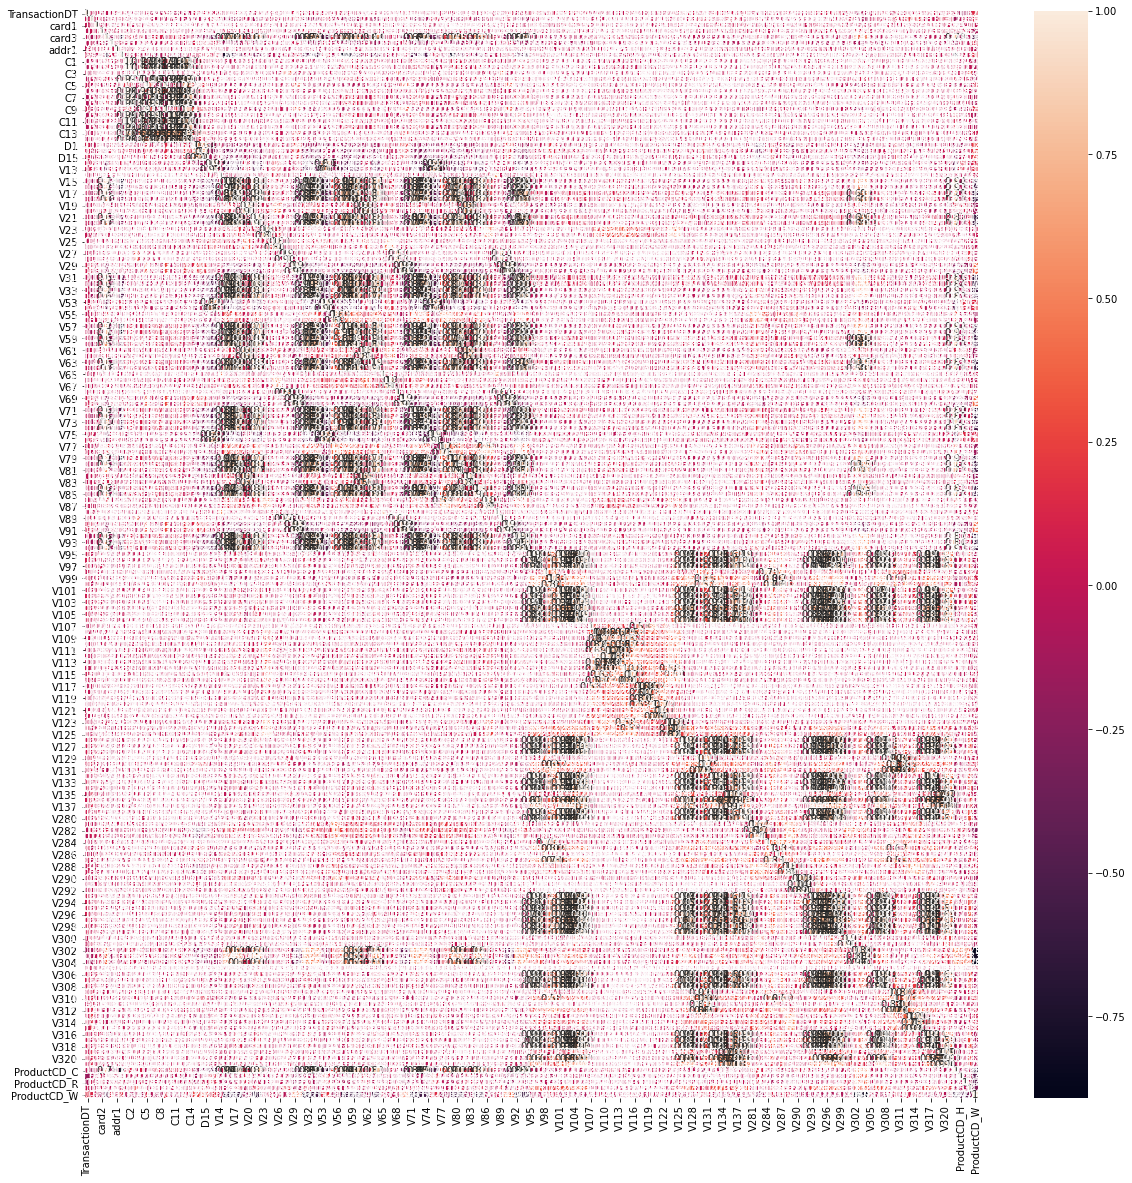

In [80]:
corr = train.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True) 

C:\Users\sadhy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


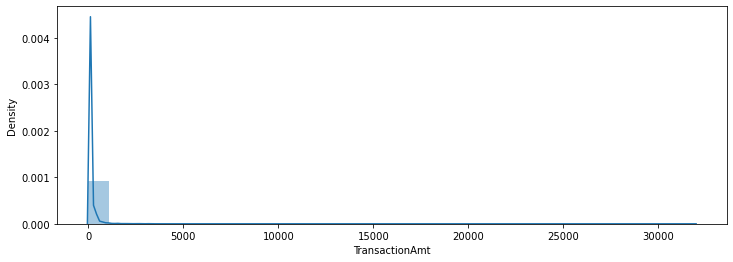

In [171]:
ax=sns.distplot(train['TransactionAmt'], bins = 30)
fig = ax.figure
fig.set_size_inches(12, 4)

C:\Users\sadhy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


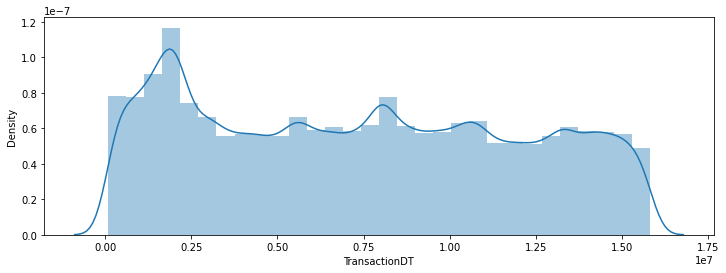

In [172]:
ax=sns.distplot(train['TransactionDT'], bins = 30)
fig = ax.figure
fig.set_size_inches(12, 4)

In [181]:
train.columns[:9]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card5'],
      dtype='object')

In [183]:
train[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card5']]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3  card5  
0       13926  321.0  150.0  142.0  
1        2755  404.0  150.0  102.0  
2        4663  490.0  150.0  166.0  
3       18132  567.0  150.0  117.0  
4        4497  514.0  150.0  102.0  
...       ...    ...    ...    ...  
590535   6550  321.0  150.0  226.0  
590536  10444  225.0  150.0  224.0  
590537  12037  595.0  150.0  224.0  
590538   7826  481.0  150.0  224.0  
590539  15066  170.0  150.0  102.0  

[590540 rows x 9 columns]

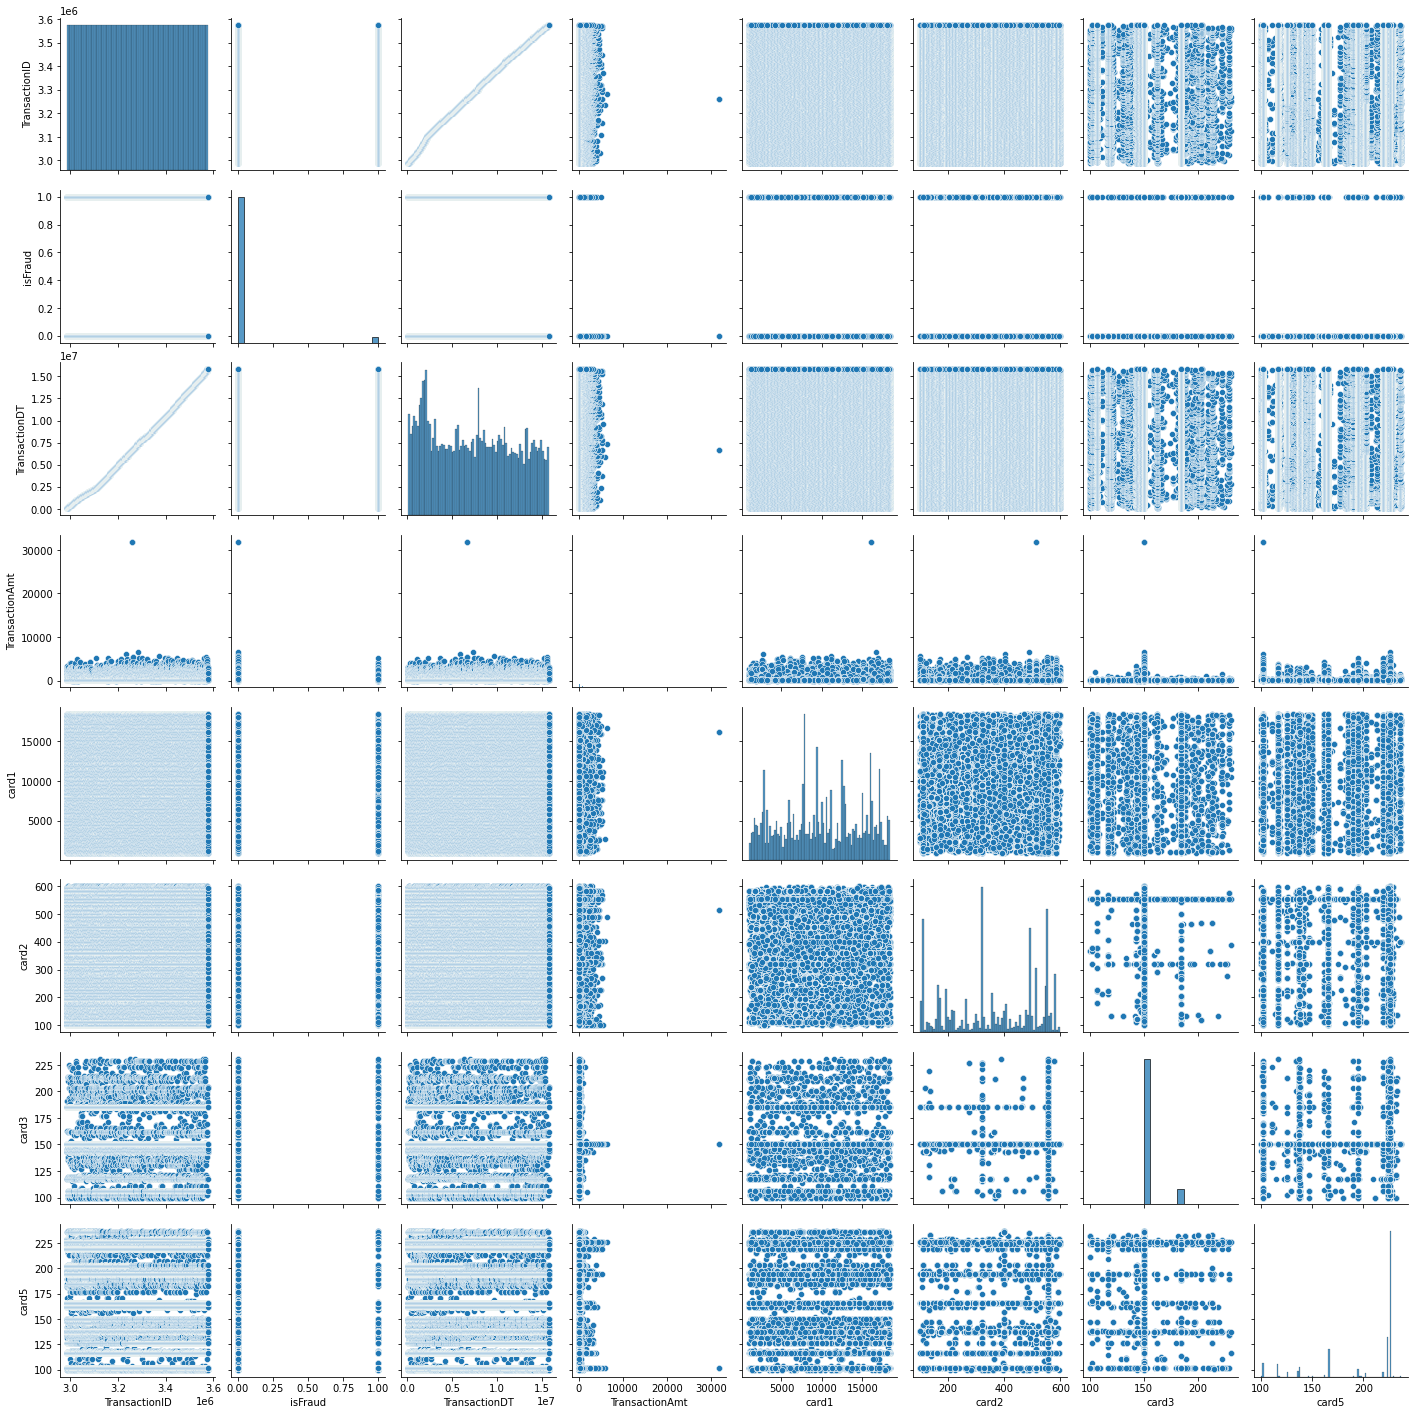

In [184]:
sns.pairplot(train[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card5']])

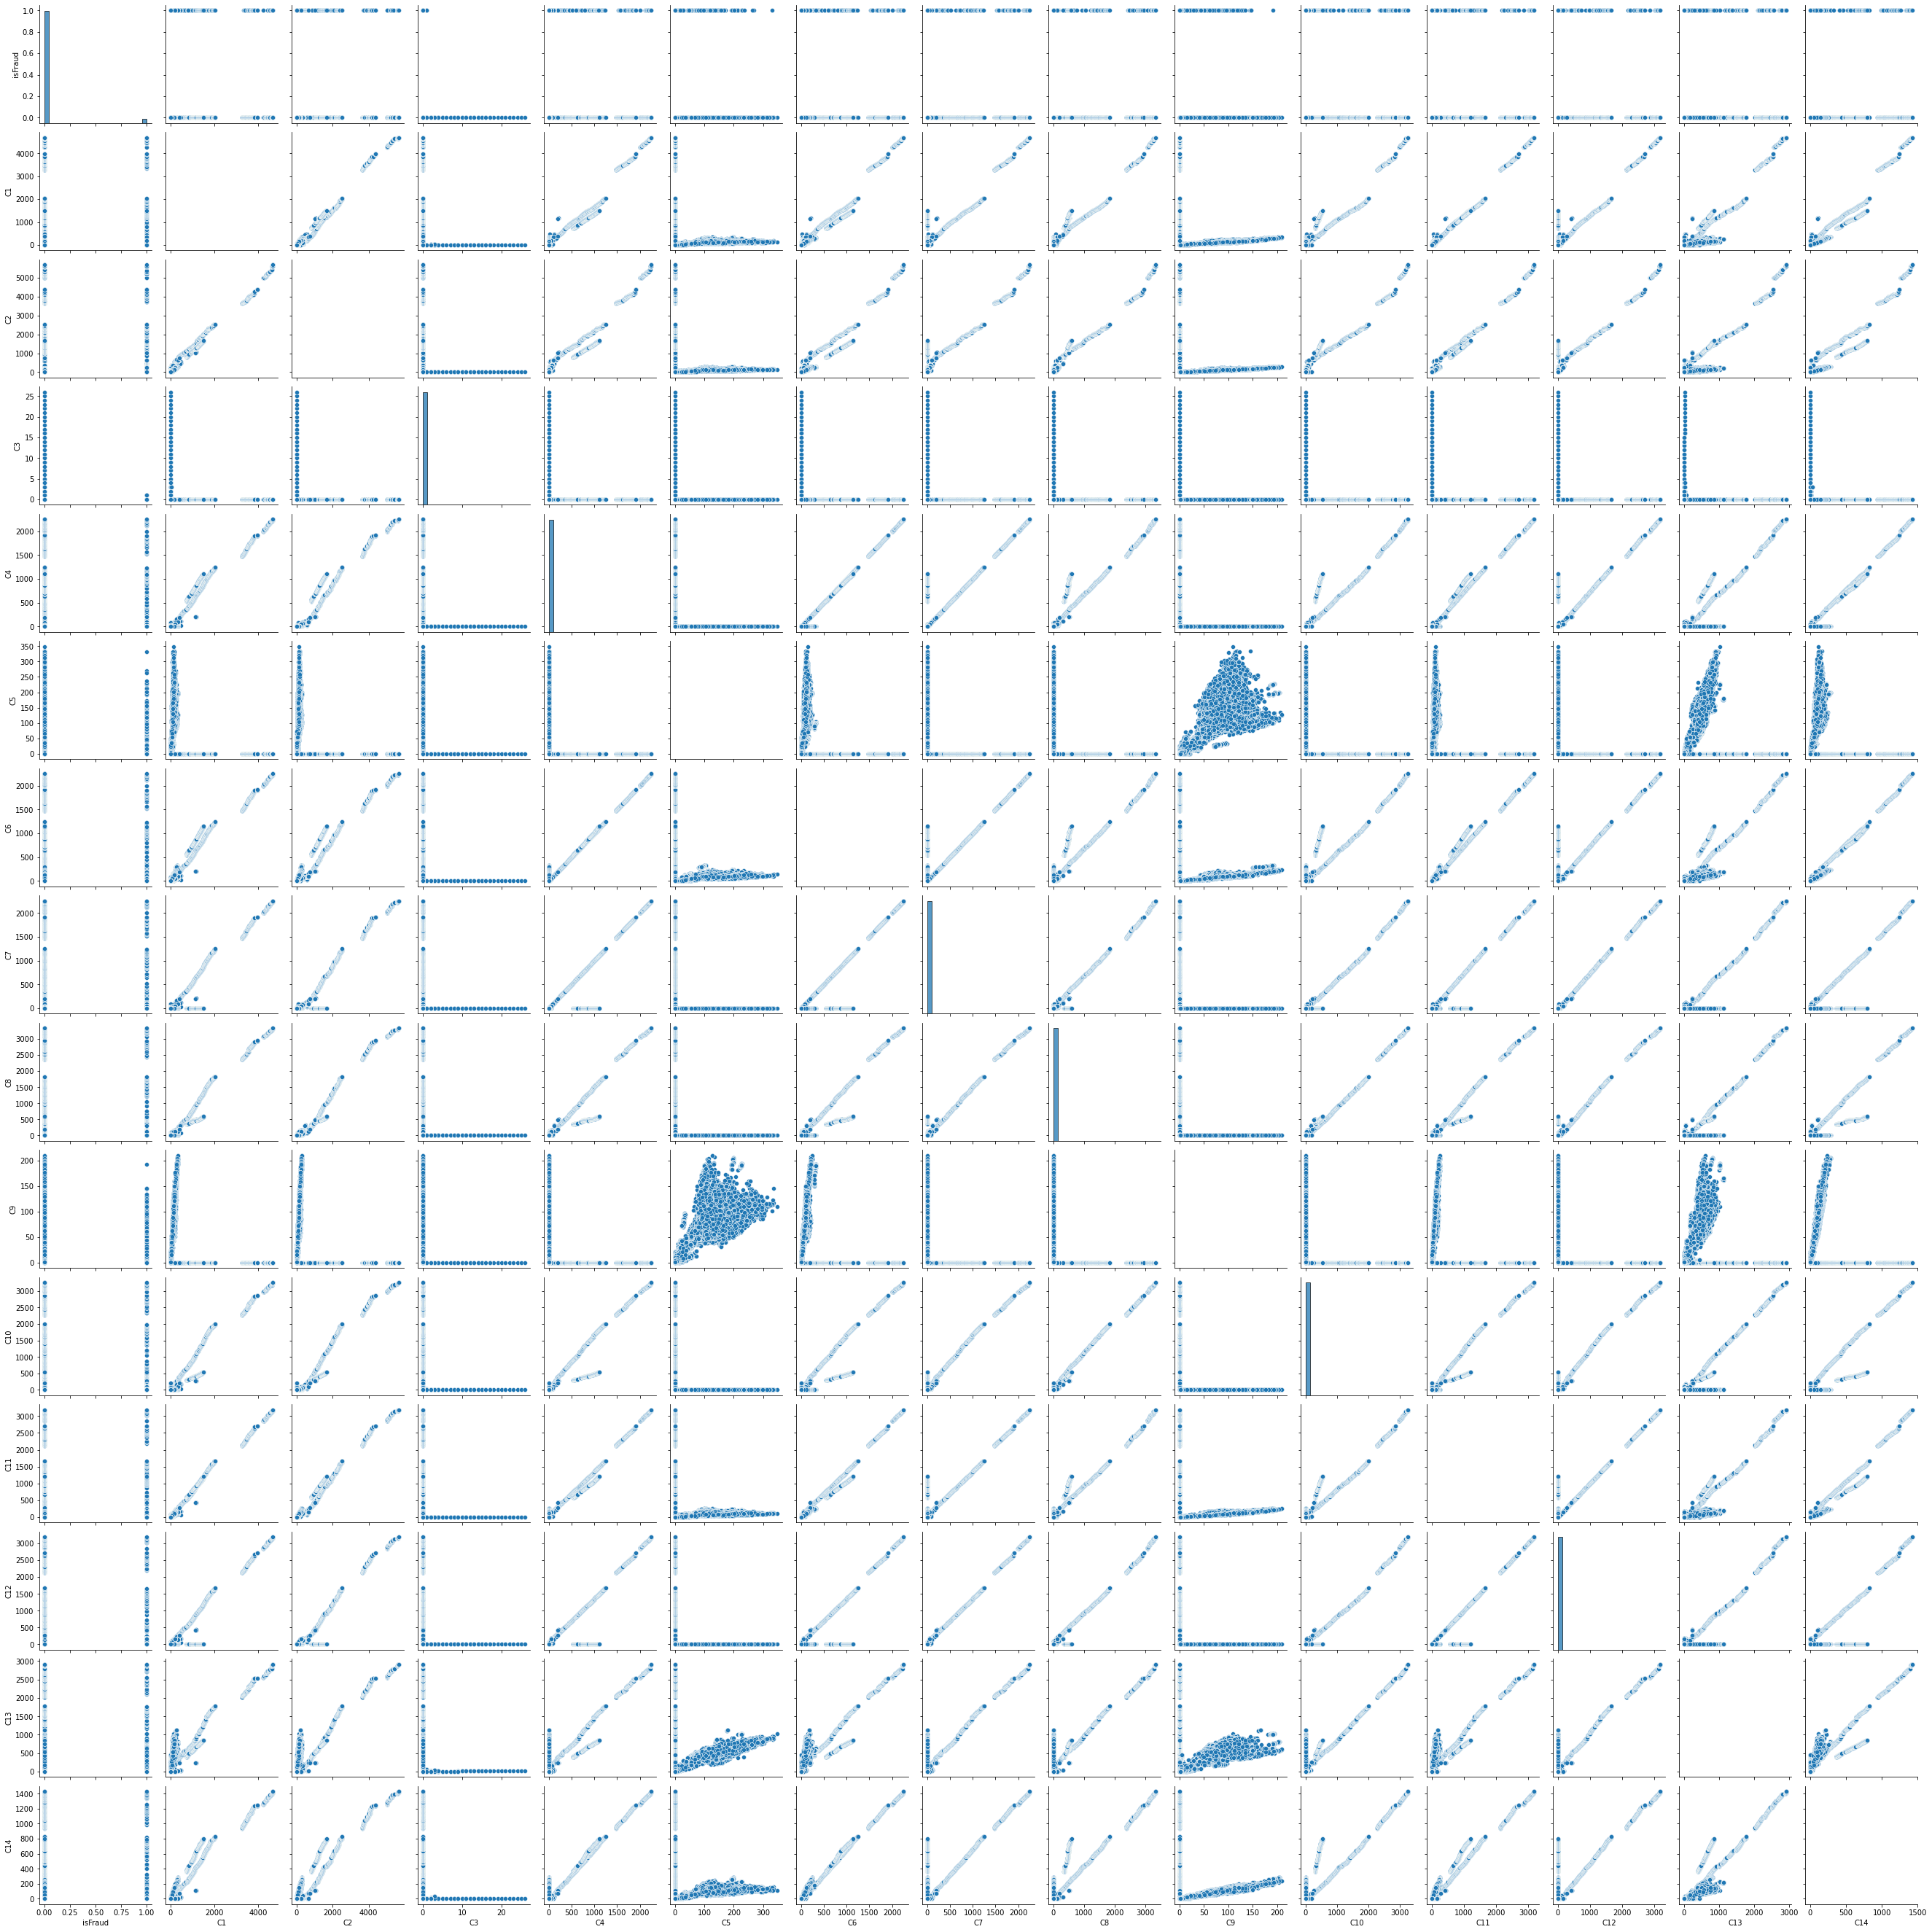

In [185]:
sns.pairplot(train[['isFraud','C1', 'C2' ,'C3' ,'C4' ,'C5' ,'C6', 'C7', 'C8' ,'C9', 'C10' ,'C11', 'C12' ,'C13' ,'C14' ]])

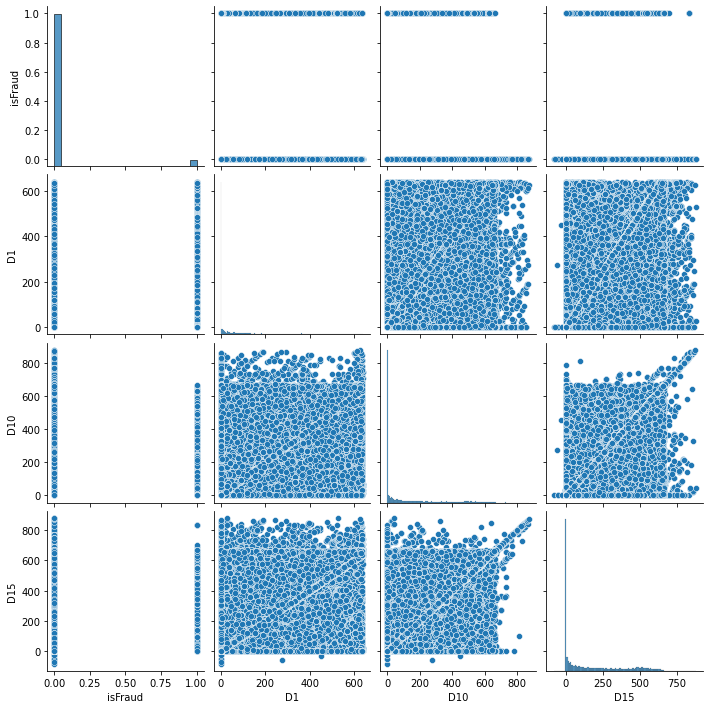

In [56]:
sns.pairplot(train[['isFraud', 'D1', 'D10' ,'D15']])

In [56]:
train = pd.get_dummies(train)
print(train.shape)
train.head()

(590540, 183)


TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0        2987000        0          86400            68.5  13926  321.0  150.0   
1        2987001        0          86401            29.0   2755  404.0  150.0   
2        2987002        0          86469            59.0   4663  490.0  150.0   
3        2987003        0          86499            50.0  18132  567.0  150.0   
4        2987004        0          86506            50.0   4497  514.0  150.0   

   card5  addr1  addr2   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
0  142.0  315.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
1  102.0  325.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2  166.0  330.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
3  117.0  476.0   87.0  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
4  102.0  420.0   87.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   

   C12   C13  C14     D1   D10    D15  V12  V13  V14  V15  V16  V17  V18  V19  \
0  0.0   1.0  1.0   14.0  13.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
1  0.0   1.0  1.0    0.0   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2  0.0   1.0  1.0    0.0   0.0  315.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
3  0.0  25.0  1.0  112.0  84.0  111.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
4  0.0   1.0  1.0    0.0   NaN    NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   

   V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  \
0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  \
0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   

   V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   

   V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96  \
0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  48.0   
4  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

    V97  V98   V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  \
0   0.0  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   1.0   
1   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
2   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
3  28.0  0.0  10.0   4.0   1.0  38.0  24.0   0.0   0.0   0.0   1.0   1.0   
4   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   

   V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   1.0   1.0   1.0   1.0   1.0

In [57]:
test = pd.get_dummies(test)
print(test.shape)
test.head()

(506691, 182)


TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  card5  \
0        3663549       18403224           31.95  10409  111.0  150.0  226.0   
1        3663550       18403263           49.00   4272  111.0  150.0  226.0   
2        3663551       18403310          171.00   4476  574.0  150.0  226.0   
3        3663552       18403310          284.95  10989  360.0  150.0  166.0   
4        3663553       18403317           67.95  18018  452.0  150.0  117.0   

   addr1  addr2   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0  170.0   87.0  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1  299.0   87.0  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2  472.0   87.0  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3  205.0   87.0  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4  264.0   87.0  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1    D10    D15  V12  V13  V14  V15  V16  V17  V18  V19  \
0  115.0  6.0  419.0  418.0  409.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1   12.0  2.0  149.0  231.0  634.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2   22.0  2.0  137.0  136.0   97.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
3    7.0  4.0   42.0  242.0  242.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
4   14.0  6.0   22.0   22.0   22.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   

   V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  \
0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   

   V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  1.0  2.0  0.0  0.0  0.0  1.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
4  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0   

   V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95  V96  V97  \
0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  1.0   
2  2.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  3.0  1.0   

   V98  V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  \
0  0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   
1  0.0  4.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   
2  0.0  3.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   1.0   1.0   1.0   1.0   
3  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   
4  1.0  3.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   

   V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  V122  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   1.0   1.0   1.0

In [58]:
train.drop(['TransactionID'], axis=1, inplace=True)
test_id = test['TransactionID']
test.drop(['TransactionID'], axis=1, inplace=True) 

In [59]:
print(train.shape)
print(test.shape) 

(590540, 182)
(506691, 181)


In [60]:
target = train['isFraud']

In [61]:
train.drop(['isFraud'], axis=1, inplace=True)
print(train.shape)
print(test.shape) 

(590540, 181)
(506691, 181)


## Modelling

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
import xgboost as xgb
from numpy import loadtxt
from xgboost import plot_importance
from matplotlib import pyplot
import warnings
import pickle

In [63]:
%%time
xgmodel = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468,
 learning_rate=0.04, max_depth=21,
 min_child_weight=1.7817, n_estimators=200,
 reg_alpha=0.4640, reg_lambda=0.8571,
 subsample=0.5213, random_state =7, nthread = -1)
xgmodel.fit(train, target) 

C:\Users\sadhy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:41:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 16min 20s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=21,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [64]:
y_pred_xg = xgmodel.predict_proba(test)

In [65]:
y_pred_xg

array([[0.99428993, 0.00571005],
       [0.9976668 , 0.0023332 ],
       [0.9856483 , 0.01435175],
       ...,
       [0.98873836, 0.01126163],
       [0.9555706 , 0.04442942],
       [0.9927441 , 0.00725593]], dtype=float32)

In [66]:
print(xgmodel.feature_importances_)

[0.00330026 0.00331021 0.00371682 0.00364926 0.01153339 0.00330555
 0.00365113 0.01171733 0.01313859 0.00545111 0.00799214 0.009149
 0.00940974 0.00494902 0.04541339 0.00584107 0.00467695 0.00726036
 0.00702811 0.01908738 0.00974137 0.01578437 0.00512504 0.00406158
 0.00451953 0.00384091 0.00400491 0.         0.00439791 0.00773003
 0.00431461 0.00409928 0.00396542 0.00422579 0.00341719 0.00513151
 0.00709383 0.00445848 0.00397242 0.00357307 0.         0.
 0.01236573 0.0064325  0.00261688 0.00279392 0.00433983 0.00600197
 0.00541453 0.00506536 0.00372705 0.00401143 0.00466107 0.00289946
 0.00308322 0.00296869 0.0044553  0.00555913 0.00293798 0.00368552
 0.         0.00353218 0.00439018 0.         0.01401596 0.03674482
 0.00577523 0.00877088 0.00423198 0.00439183 0.00402326 0.0045795
 0.00390186 0.00346037 0.00315102 0.00626501 0.00414491 0.0046942
 0.00473603 0.00360263 0.00331428 0.0150949  0.00891723 0.00273624
 0.         0.02037917 0.02453123 0.0068948  0.00478441 0.0165498
 0.00307

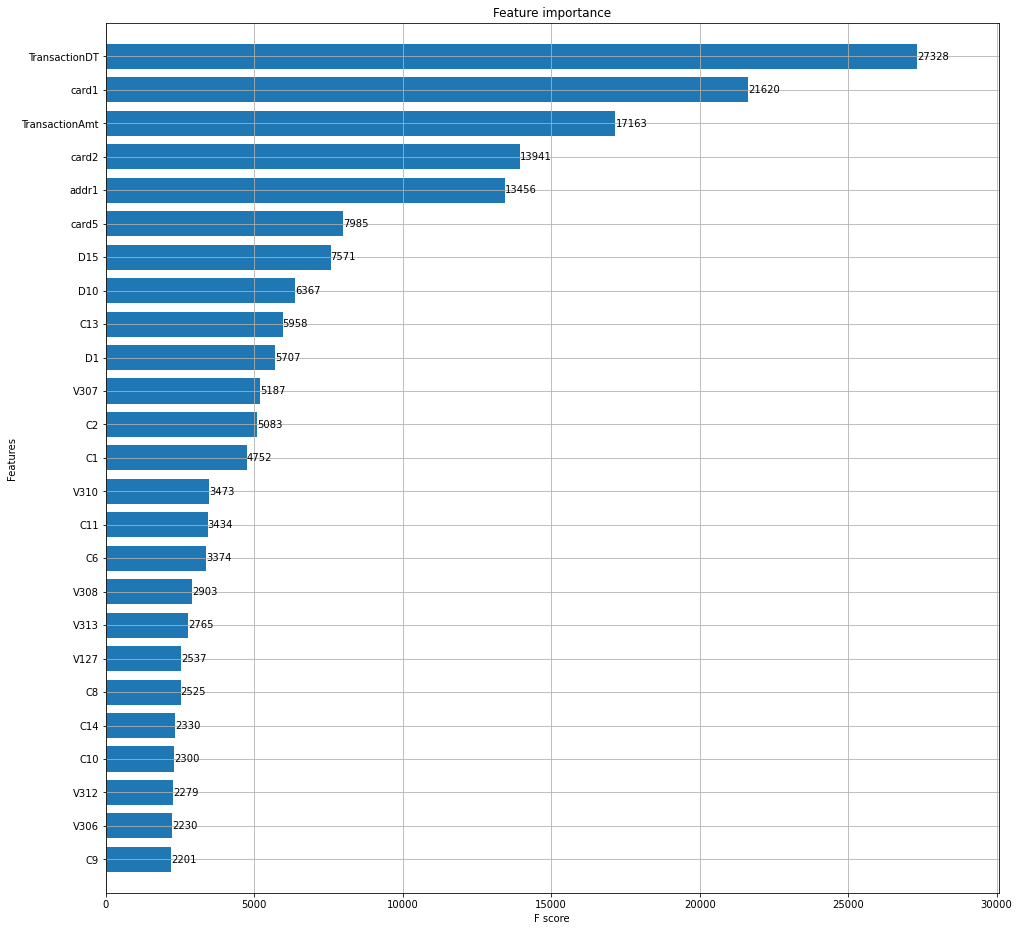

In [67]:
ax = xgb.plot_importance(xgmodel, max_num_features = 25, height = 0.75 )
fig = ax.figure
fig.set_size_inches(16, 16)


In [70]:
fig.savefig('Important_Features.png')

## Generating Submission File

In [71]:
sub = pd.DataFrame()
sub['TransactionID'] = test_id
sub['isFraud'] = y_pred_xg[:, 1]
sub.to_csv('submission_xgb_final.csv', index=False) 